## **Research Question:** Can we identify distinct groups of states based on gun law profiles? 

In [22]:
import numpy as np
import pandas as pd

In [13]:
Firearm_Data = pd.read_csv('../Data/processed/firearm_data_cleaned_new.csv')
pd.set_option('display.max_columns', None)
Firearm_Data.head()

,year,state,rate,deaths,state_name,law_strength_score,restrictive_laws,permissive_laws,total_law_changes,unique_law_classes,strength_background_checks,strength_carrying_a_concealed_weapon_ccw,strength_castle_doctrine,strength_dealer_license,strength_firearm_sales_restrictions,strength_local_laws_preempted_by_state,strength_minimum_age,strength_prohibited_possessor,strength_registration,strength_waiting_period,strength_firearm_removal_at_scene_of_domestic_violence,strength_firearms_in_college_university,strength_child_access_laws,strength_gun_trafficking,strength_open_carry,strength_required_reporting_of_lost_or_stolen_firearms,strength_safety_training_required,strength_untraceable_firearms,strength_permit_to_purchase,strength_firearms_in_k_12_educational_settings,rate_change,law_strength_change
0,2014,AK,19.2,145,Alaska,11,18,7,25,9,2,-1,-4,0,3,-1,7,2,0,2,1,0,0,0,0,0,0,0,0,0,NaN,NaN
1,2015,AK,23.4,177,Alaska,11,18,7,25,9,2,-1,-4,0,3,-1,7,2,0,2,1,0,0,0,0,0,0,0,0,0,4.2,0.0
2,2016,AK,23.3,177,Alaska,11,18,7,25,9,2,-1,-4,0,3,-1,7,2,0,2,1,0,0,0,0,0,0,0,0,0,-0.1,0.0
3,2017,AK,24.5,180,Alaska,11,18,7,25,9,2,-1,-4,0,3,-1,7,2,0,2,1,0,0,0,0,0,0,0,0,0,1.2,0.0
4,2018,AK,21.0,155,Alaska,11,18,7,25,9,2,-1,-4,0,3,-1,7,2,0,2,1,0,0,0,0,0,0,0,0,0,-3.5,0.0


In [10]:
Firearm_Data.shape

(502, 32)

In [ ]:
Firearm_Data.columns

Index(['year', 'state', 'rate', 'deaths', 'state_name', 'law_strength_score',
       'restrictive_laws', 'permissive_laws', 'total_law_changes',
       'unique_law_classes', 'strength_background_checks',
       'strength_carrying_a_concealed_weapon_ccw', 'strength_castle_doctrine',
       'strength_dealer_license', 'strength_firearm_sales_restrictions',
       'strength_local_laws_preempted_by_state', 'strength_minimum_age',
       'strength_prohibited_possessor', 'strength_registration',
       'strength_waiting_period',
       'strength_firearm_removal_at_scene_of_domestic_violence',
       'strength_firearms_in_college_university', 'strength_child_access_laws',
       'strength_gun_trafficking', 'strength_open_carry',
       'strength_required_reporting_of_lost_or_stolen_firearms',
       'strength_safety_training_required', 'strength_untraceable_firearms',
       'strength_permit_to_purchase',
       'strength_firearms_in_k_12_educational_settings', 'rate_change',
       'law_stren

In [11]:
Firearm_Data.dtypes

year                                                        int64
state                                                      object
rate                                                      float64
deaths                                                      int64
state_name                                                 object
law_strength_score                                          int64
restrictive_laws                                            int64
permissive_laws                                             int64
total_law_changes                                           int64
unique_law_classes                                          int64
strength_background_checks                                  int64
strength_carrying_a_concealed_weapon_ccw                    int64
strength_castle_doctrine                                    int64
strength_dealer_license                                     int64
strength_firearm_sales_restrictions                         int64
strength_l

In [14]:
# Check the max year

max_year = Firearm_Data['year'].max()
print(f"Maximum year in the dataset: {max_year}")

Maximum year in the dataset: 2023


In [ ]:
# Filter the data for the maximum year
Latest_Firearm_Data = Firearm_Data[Firearm_Data['year'] == max_year].copy()
Latest_Firearm_Data.head()

,year,state,rate,deaths,state_name,law_strength_score,restrictive_laws,permissive_laws,total_law_changes,unique_law_classes,strength_background_checks,strength_carrying_a_concealed_weapon_ccw,strength_castle_doctrine,strength_dealer_license,strength_firearm_sales_restrictions,strength_local_laws_preempted_by_state,strength_minimum_age,strength_prohibited_possessor,strength_registration,strength_waiting_period,strength_firearm_removal_at_scene_of_domestic_violence,strength_firearms_in_college_university,strength_child_access_laws,strength_gun_trafficking,strength_open_carry,strength_required_reporting_of_lost_or_stolen_firearms,strength_safety_training_required,strength_untraceable_firearms,strength_permit_to_purchase,strength_firearms_in_k_12_educational_settings,rate_change,law_strength_change
9,2023,AK,23.5,176,Alaska,11,18,7,25,9,2,-1,-4,0,3,-1,7,2,0,2,1,0,0,0,0,0,0,0,0,0,1.1,0.0
19,2023,AL,25.6,1292,Alabama,15,21,6,27,10,3,-2,-3,1,3,-1,5,5,2,2,0,0,0,0,0,0,0,0,0,0,0.1,-1.0
29,2023,AR,21.9,671,Arkansas,12,20,8,28,9,4,-2,-3,0,3,-1,6,2,0,2,0,1,0,0,0,0,0,0,0,0,0.0,0.0
39,2023,AZ,18.5,1419,Arizona,16,24,8,32,9,3,-1,-3,0,3,-2,7,6,0,2,1,0,0,0,0,0,0,0,0,0,-1.6,0.0
49,2023,CA,8.0,3209,California,68,77,9,86,18,11,-2,-2,2,8,-3,9,15,4,4,1,2,1,2,4,5,4,3,0,0,-0.6,1.0


In [17]:
# Select the features for gun law profiles

law_features = [col for col in Firearm_Data.columns if col.startswith('strength_')]
law_features

['strength_background_checks',
 'strength_carrying_a_concealed_weapon_ccw',
 'strength_castle_doctrine',
 'strength_dealer_license',
 'strength_firearm_sales_restrictions',
 'strength_local_laws_preempted_by_state',
 'strength_minimum_age',
 'strength_prohibited_possessor',
 'strength_registration',
 'strength_waiting_period',
 'strength_firearm_removal_at_scene_of_domestic_violence',
 'strength_firearms_in_college_university',
 'strength_child_access_laws',
 'strength_gun_trafficking',
 'strength_open_carry',
 'strength_required_reporting_of_lost_or_stolen_firearms',
 'strength_safety_training_required',
 'strength_untraceable_firearms',
 'strength_permit_to_purchase',
 'strength_firearms_in_k_12_educational_settings']

In [18]:
law_features.append('law_strength_score')
law_features

['strength_background_checks',
 'strength_carrying_a_concealed_weapon_ccw',
 'strength_castle_doctrine',
 'strength_dealer_license',
 'strength_firearm_sales_restrictions',
 'strength_local_laws_preempted_by_state',
 'strength_minimum_age',
 'strength_prohibited_possessor',
 'strength_registration',
 'strength_waiting_period',
 'strength_firearm_removal_at_scene_of_domestic_violence',
 'strength_firearms_in_college_university',
 'strength_child_access_laws',
 'strength_gun_trafficking',
 'strength_open_carry',
 'strength_required_reporting_of_lost_or_stolen_firearms',
 'strength_safety_training_required',
 'strength_untraceable_firearms',
 'strength_permit_to_purchase',
 'strength_firearms_in_k_12_educational_settings',
 'law_strength_score']

In [20]:
law_features_df = Latest_Firearm_Data[['state_name'] + law_features].set_index('state_name') 
law_features_df.head()


,strength_background_checks,strength_carrying_a_concealed_weapon_ccw,strength_castle_doctrine,strength_dealer_license,strength_firearm_sales_restrictions,strength_local_laws_preempted_by_state,strength_minimum_age,strength_prohibited_possessor,strength_registration,strength_waiting_period,strength_firearm_removal_at_scene_of_domestic_violence,strength_firearms_in_college_university,strength_child_access_laws,strength_gun_trafficking,strength_open_carry,strength_required_reporting_of_lost_or_stolen_firearms,strength_safety_training_required,strength_untraceable_firearms,strength_permit_to_purchase,strength_firearms_in_k_12_educational_settings,law_strength_score
state_name,,,,,,,,,,,,,,,,,,,,,
Alaska,2,-1,-4,0,3,-1,7,2,0,2,1,0,0,0,0,0,0,0,0,0,11
Alabama,3,-2,-3,1,3,-1,5,5,2,2,0,0,0,0,0,0,0,0,0,0,15
Arkansas,4,-2,-3,0,3,-1,6,2,0,2,0,1,0,0,0,0,0,0,0,0,12
Arizona,3,-1,-3,0,3,-2,7,6,0,2,1,0,0,0,0,0,0,0,0,0,16
California,11,-2,-2,2,8,-3,9,15,4,4,1,2,1,2,4,5,4,3,0,0,68


In [21]:
# Standardize the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_features = scaler.fit_transform(law_features_df)
scaled_features_df = pd.DataFrame(scaled_features, columns=law_features, index=law_features_df.index)

scaled_features_df.head()

,strength_background_checks,strength_carrying_a_concealed_weapon_ccw,strength_castle_doctrine,strength_dealer_license,strength_firearm_sales_restrictions,strength_local_laws_preempted_by_state,strength_minimum_age,strength_prohibited_possessor,strength_registration,strength_waiting_period,strength_firearm_removal_at_scene_of_domestic_violence,strength_firearms_in_college_university,strength_child_access_laws,strength_gun_trafficking,strength_open_carry,strength_required_reporting_of_lost_or_stolen_firearms,strength_safety_training_required,strength_untraceable_firearms,strength_permit_to_purchase,strength_firearms_in_k_12_educational_settings,law_strength_score
state_name,,,,,,,,,,,,,,,,,,,,,
Alaska,-1.133920,0.766925,-2.024846,-0.677834,-0.581044,0.225196,0.255690,-0.807084,-0.502625,0.030942,0.621858,-0.821014,-1.376997,-0.570323,0.110997,-0.632785,-0.392837,-0.471652,-0.483756,0.398862,-0.833270
Alabama,-0.783436,-0.187055,-0.765490,0.338917,-0.581044,0.225196,-0.747400,0.094258,1.633530,0.030942,-1.360314,-0.821014,-1.376997,-0.570323,0.110997,-0.632785,-0.392837,-0.471652,-0.483756,0.398862,-0.566414
Arkansas,-0.432951,-0.187055,-0.765490,-0.677834,-0.581044,0.225196,-0.245855,-0.807084,-0.502625,0.030942,-1.360314,-0.045612,-1.376997,-0.570323,0.110997,-0.632785,-0.392837,-0.471652,-0.483756,0.398862,-0.766556
Arizona,-0.783436,0.766925,-0.765490,-0.677834,-0.581044,-1.210427,0.255690,0.394705,-0.502625,0.030942,0.621858,-0.821014,-1.376997,-0.570323,0.110997,-0.632785,-0.392837,-0.471652,-0.483756,0.398862,-0.499700
California,2.020440,-0.187055,0.493865,1.355669,2.112886,-2.646051,1.258780,3.098732,3.769685,1.608974,0.621858,0.729790,0.521026,1.192494,3.884894,2.728886,4.949747,2.665861,-0.483756,0.398862,2.969424


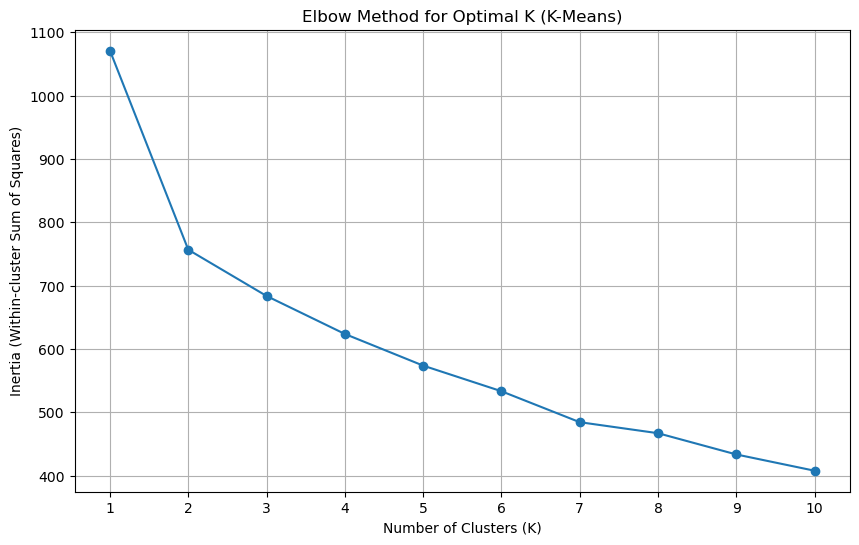

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters (K) using the elbow method

inertia = []
K_range = range(1, 11)
for k in K_range:
    # Set random state for reproducibility
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K (K-Means)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.xticks(K_range)
plt.grid(True)
plt.show()

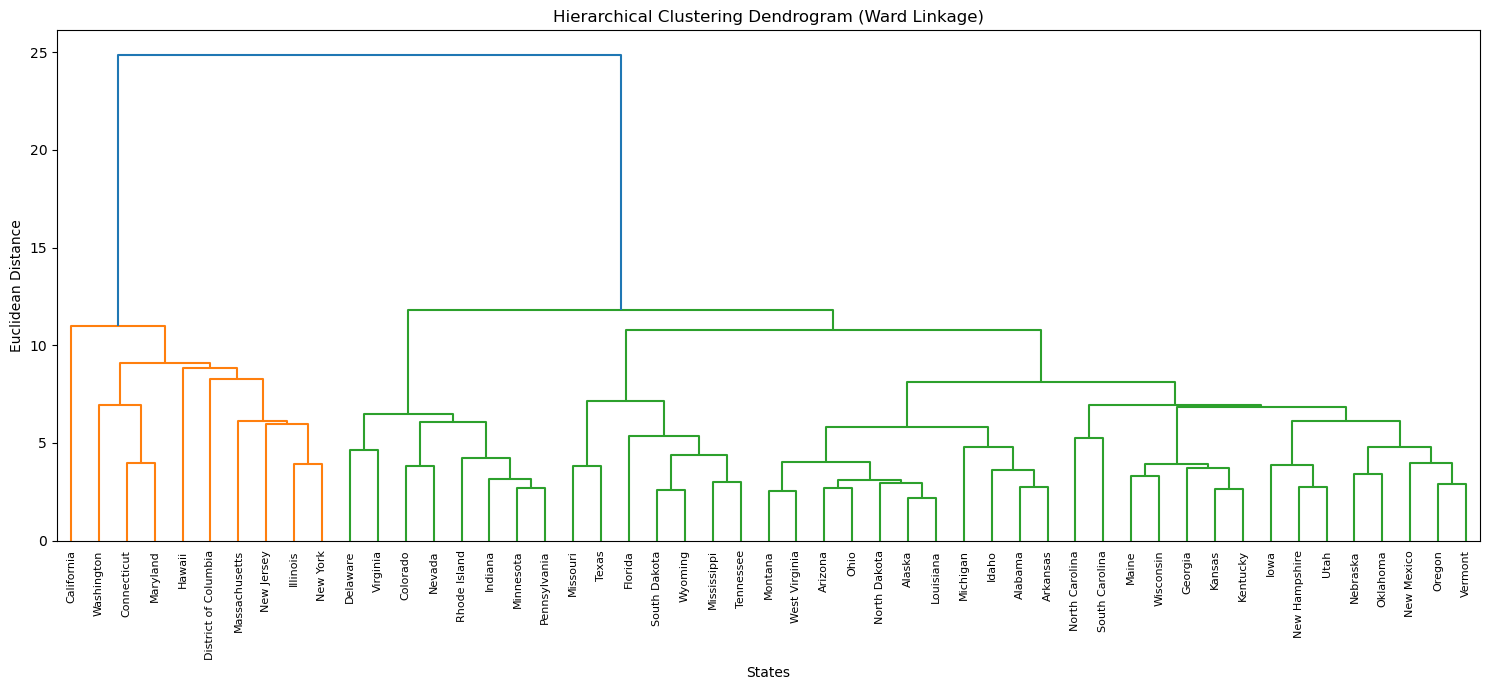

In [27]:
# 1. K-Means Clustering with K=3 (based on a likely elbow point)
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
Latest_Firearm_Data['kmeans_cluster'] = kmeans.fit(scaled_features)

# 2. Add the cluster labels to the state DataFrame (using the original unscaled features)
cluster_df = Latest_Firearm_Data[['state_name', 'state', 'kmeans_cluster'] + law_features]

# 3. Analyze the cluster characteristics
cluster_summary = cluster_df.groupby('kmeans_cluster')[law_features].mean()

# Sort by the overall law strength score for better interpretation
cluster_summary_sorted = cluster_summary.sort_values(by='law_strength_score', ascending=False)

# Print the cluster summary
cluster_summary_sorted

# 4. Perform Hierarchical Clustering (Dendrogram)

from scipy.cluster.hierarchy import linkage, dendrogram

# Use 'ward' linkage for minimum variance
Z = linkage(scaled_features, method='ward')

plt.figure(figsize=(15,7))
dendrogram(
    Z,
    orientation='top',
    labels=law_features_df.index.tolist(), # Use state names as labels
    leaf_rotation=90,
    leaf_font_size=8
)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.ylabel('Euclidean Distance')
plt.xlabel('States')
plt.tight_layout()
plt.show()

# KNN

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [29]:
# 1. Data Preparation

# Features
X_features = Latest_Firearm_Data[law_features]

# 2. Scaling the features 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)
X_scaled_df = pd.DataFrame(X_scaled, columns=law_features, index=Latest_Firearm_Data['state_name'])

# 3. Generating Cluster Labels (Target Variable Y)

# We can use the K-Means results (K=3) from the previous analysis as the labels for supervised learning

K = 3
kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
# Y is the target variable (the cluster label)
y_clusters = kmeans.fit_predict(X_scaled)
Latest_Firearm_Data['kmeans_cluster'] = y_clusters
print(f"Cluster labels (0, 1, 2) generated using K-Means with K={K}.")

# 4. Splitting the Data for Training and Testing

# Split the scaled features (X_scaled) and cluster labels (y_clusters)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_clusters, test_size=0.3, random_state=42, stratify=y_clusters
)
print(f"Training set size: {len(X_train)} states")
print(f"Testing set size: {len(X_test)} states")

# 5. Training the KNN Classifier

# Initialize the KNN model. We choose K = 5 (a common starting point)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)
print("\n--- KNN Model Trained Successfully (K=5) ---")

# 6. Evaluating the Model

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy on Test Set: {accuracy:.2f}")

# 7. Demonstration: Predicting a Hypothetical New State ---

# Create a hypothetical state profile. Let's create a state with moderate-to-strong laws
# (e.g., high background check score, moderate permit-to-purchase)
hypothetical_state_data = pd.DataFrame({
    'strength_background_checks': [7],
    'strength_carrying_a_concealed_weapon_ccw': [-1], # Neutral CCW laws
    'strength_castle_doctrine': [-2],
    'strength_dealer_license': [1],
    'strength_firearm_sales_restrictions': [4],
    'strength_local_laws_preempted_by_state': [0],
    'strength_minimum_age': [6],
    'strength_prohibited_possessor': [5],
    'strength_registration': [0],
    'strength_waiting_period': [2],
    'strength_firearm_removal_at_scene_of_domestic_violence': [1],
    'strength_firearms_in_college_university': [0],
    'strength_child_access_laws': [1],
    'strength_gun_trafficking': [1],
    'strength_open_carry': [0],
    'strength_required_reporting_of_lost_or_stolen_firearms': [1],
    'strength_safety_training_required': [1],
    'strength_untraceable_firearms': [1],
    'strength_permit_to_purchase': [1],
    'strength_firearms_in_k_12_educational_settings': [0],
    'law_strength_score': [35] # A synthesized score
})

# IMPORTANT: Scale the hypothetical state data using the SAME scaler object
hypothetical_scaled = scaler.transform(hypothetical_state_data)

# Predict the cluster for the hypothetical state
predicted_cluster = knn.predict(hypothetical_scaled)

# Get the probability distribution for the prediction
predicted_probs = knn.predict_proba(hypothetical_scaled)[0]

print("\n--- Hypothetical State Prediction ---")
print(f"Input Features: A synthesized score of 35.")
print(f"Predicted Cluster (K=5): {predicted_cluster[0]}")
print(f"Prediction Probabilities across clusters: {np.round(predicted_probs, 2)}")
print("\nInterpretation:")
print("Cluster 1: Most Restrictive (Score ~49.5)")
print("Cluster 2: Moderately Restrictive (Score ~24.5)")
print("Cluster 0: Least Restrictive (Score ~12.9)")
print(f"\nThe hypothetical state (Score=35) is classified into Cluster {predicted_cluster[0]}, indicating it has a **Moderately Restrictive** profile.")

Cluster labels (0, 1, 2) generated using K-Means with K=3.
Training set size: 35 states
Testing set size: 16 states

--- KNN Model Trained Successfully (K=5) ---

Model Accuracy on Test Set: 0.75

--- Hypothetical State Prediction ---
Input Features: A synthesized score of 35.
Predicted Cluster (K=5): 2
Prediction Probabilities across clusters: [0.2 0.  0.8]

Interpretation:
Cluster 1: Most Restrictive (Score ~49.5)
Cluster 2: Moderately Restrictive (Score ~24.5)
Cluster 0: Least Restrictive (Score ~12.9)

The hypothetical state (Score=35) is classified into Cluster 2, indicating it has a **Moderately Restrictive** profile.
